# Classification Modeling

## Library Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [4]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("darkgrid")

## Data Loading

In [5]:
df = pd.read_csv('data/churn.csv')

We are not removing any outliers from this dataset, so we will use the original data. 

In [6]:
df['churn'].value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

The most common churn is False at 85.51%, so this will be our baseline for determining if our classification models do well. 

## Modeling

In [7]:
def model_factory(model, columns):
    """
    Creator: Daniel
    inputs: 
        model: The machine learning model object to use in the pipeline
        columns: the list of columns to use for scaling
    outputs:
        returns the model, ready to be fitted and used. 
    """
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), columns)
        ],
        remainder='passthrough'
    )
    # this preprocessor will scale the columns passed in. Any other columns will go through without being scaled. 
    model = Pipeline(
        steps=[
            ('preprocess', preprocessor),
            ('model', model)
        ]
    )
    # this is the pipeline the model will use, so it will first scale it with the preprocessor, then run it through the model. 
    # this will make it easier to use, as it will scale the inputs automatically, so it doesn't need to be scaled
    # outside of the model. 
    return model

### Logisitic Regression and Random Forest

In [8]:
df.columns

Index(['account_length', 'vmail_message', 'day_mins', 'day_calls',
       'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins',
       'night_calls', 'night_charge', 'intl_mins', 'intl_calls', 'intl_charge',
       'custserv_calls', 'churn'],
      dtype='object')

In [9]:
cols = ['day_charge', 'eve_charge', 'night_charge', 'intl_charge', 'custserv_calls']
# columns used for modeling

I am including only the columns relating to the cost and the customer service calls. I believe the most important thing to cusotmers is the cost. The number of calls and how long the calls are won't change from phone plan to phone plan, but the cost may differ. I am also including customer service calls, as this can relate to how happy or unhappy a customer is with their plan. 

In [10]:

X = df[cols]
# independent features
y = df['churn']
# target variable

In [11]:
scores = []
# list of scores for the below for loop
for i in np.arange(0.2, 0.4, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42, stratify=y)
    # splits the data into training and testing data, split on different test sizes (i)
    # stratify makes sure that both training and testing data have proportinal number of target values. 
    logreg = model_factory(LogisticRegression(), X.columns)
    rf = model_factory(RandomForestClassifier(random_state=42), X.columns)
    # creates teh logisitic regression model and random forest classificaiton model using
    # the model factory created previously. 
    logreg.fit(X_train, y_train)
    # fits teh logreg model
    log_score = logreg.score(X_test, y_test)
    # logs the accuracy score of the lgoreg model
    rf.fit(X_train, y_train)
    # fits the random forest model
    rf_score = rf.score(X_test, y_test)
    # logs teh accuracy score of the random forest model. 
    scores.append({'Logistic Regression': log_score, 'Random Forest': rf_score, 'test_size': i})
    # appends the scores and test size to the scores list. 

In [12]:
score_df=  pd.DataFrame(scores)
# makes a dataframe of the scores list. 

In [13]:
score_df.sort_values(by='Random Forest', ascending=False)
# sorts the score dataframe by score of random forest. 

,Logistic Regression,Random Forest,test_size
8,0.850107,0.914347,0.28
10,0.853000,0.910000,0.30
9,0.852120,0.908997,0.29
4,0.848750,0.908750,0.24
13,0.853636,0.907273,0.33
12,0.851921,0.907216,0.32
19,0.854615,0.906923,0.39
14,0.853616,0.906526,0.34
5,0.847722,0.906475,0.25
11,0.852031,0.906190,0.31


In [14]:
score_df.sort_values(by='Logistic Regression', ascending=False)
# sorts the score dataframe by score of  logisitic regression

,Logistic Regression,Random Forest,test_size
19,0.854615,0.906923,0.39
18,0.853986,0.906077,0.38
13,0.853636,0.907273,0.33
14,0.853616,0.906526,0.34
15,0.853470,0.905741,0.35
10,0.853000,0.910000,0.30
17,0.852512,0.905997,0.37
16,0.852500,0.900000,0.36
9,0.852120,0.908997,0.29
11,0.852031,0.906190,0.31


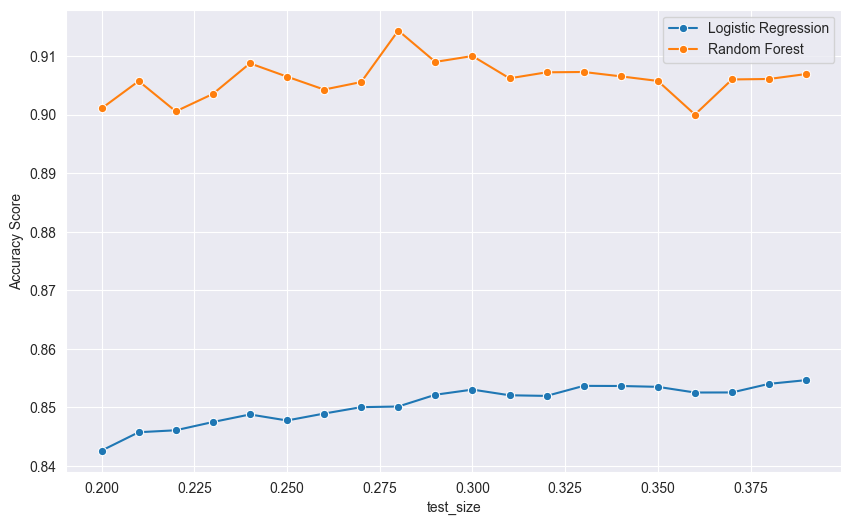

In [15]:
sns.lineplot(data=score_df, x='test_size', y='Logistic Regression', marker='o', label='Logistic Regression')
sns.lineplot(data=score_df, x='test_size', y='Random Forest', marker='o', label='Random Forest')
plt.legend()
plt.ylabel("Accuracy Score")
plt.savefig('./images/random_forest_logreg.png')
# plots the accuacy scores line plots of both models 

> we can see with the above lineplots, Random Forest performs best with a test size of 28%, meaning a 72/28 split for training and testing data, getting an accuracy score of ~91%. Logistic Regression peaked at a test size of 39%, with a score of ~85%.
>
> Next we will look at KNN with differnt neighbor and test sizes

### KNN

In [16]:
scores = []
# list of scores for the below for loop
for i in np.arange(0.2, 0.4, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42, stratify=y)
    # splits the data into training and testing data, split on different test sizes (i)
    # stratify makes sure that both training and testing data have proportinal number of target values. 
    for neighbor in range(3, 31, 2):
        knn = model_factory(KNeighborsClassifier(n_neighbors=neighbor), X.columns)
        # creates KNN model with model factory at different n_neighbors values
        knn.fit(X_train, y_train)
        # fits the KNN model
        knn_score = knn.score(X_test, y_test)
        # socres the knn model
        scores.append({'n': neighbor, 'score': knn_score, 'test_size': i})
        # adds teh score, neighbot, and test size to the scores list. 

In [17]:
score_df = pd.DataFrame(scores)
# makes dataframe from the scores list

In [18]:
score_df.sort_values(by='score', ascending=False)
# sorts the dataframe by score descending, so the highest score is on top. 

,n,score,test_size
99,5,0.898889,0.27
100,7,0.897778,0.27
58,7,0.897500,0.24
85,5,0.897347,0.26
71,5,0.896882,0.25
...,...,...,...
154,3,0.872340,0.31
98,3,0.872222,0.27
126,3,0.871768,0.29
0,3,0.871064,0.20


> For KNN, the best params found were 5 neighbors, and a test size of 27%, getting a score of ~90%. 

The below report use the same code as above to create the model and split the data, but uses the optimal test size. 

### Random Forest Report

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42, stratify=y)
    
rf = model_factory(RandomForestClassifier(random_state=42), X.columns)

In [42]:
rf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [43]:
rf_preds = rf.predict(X_test)
# creates preedictions of the test dataset

In [44]:
print(classification_report(y_test, rf_preds))
# outputs a classification report of the random forest model

              precision    recall  f1-score   support

       False       0.93      0.98      0.95       799
        True       0.80      0.55      0.65       135

    accuracy                           0.91       934
   macro avg       0.86      0.76      0.80       934
weighted avg       0.91      0.91      0.91       934



We can see in the above classification report, the model does very well at predicting false values, getting a percision of 0.93 (93% of predicted false values were actually false), and a recall of 0.98 (98% of false values were successfully found). 

However, for true values, the percision was only 80%, and the recall only 55%.

This indicates that the model can very accurately predict false values (customers that don't churn), but it will miss quite a few customers who will churn. 

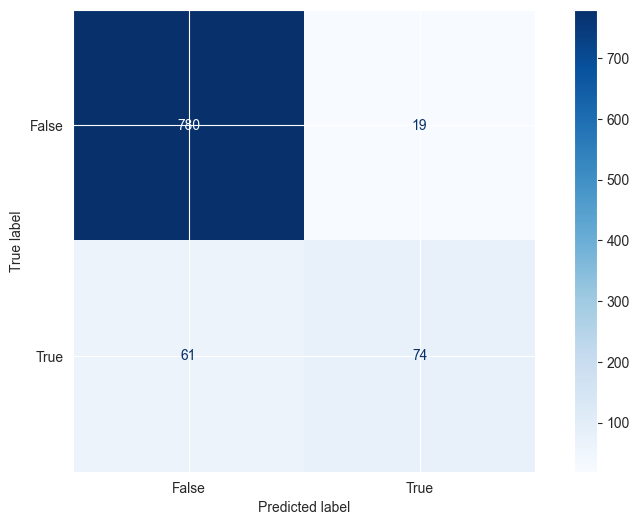

In [45]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
# creates a confusion matrix 
plt.savefig('./images/rf_conf.png')

The above confusion matrix tells us the number of True Positives (bottom right, predicted true, is true), True Negatives (top left, predicted false, is false), False Positives (top right, predicted true, is false) and False Negatives (bottom left, predicted false, is true)

So in this case, the model accurately predicted 780 False results, and 74 True results. 

However, it missed 61 true results, and 19 false results. So, 61 customers that it predicted would not churn did, and 19 customers it predicted would churn didn't. 

This isn't ideal, but this model does perform better than the other models, which are seen below. 

### Logistic Regression Report

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.39, random_state=42, stratify=y)
    
lr = model_factory(LogisticRegression(), X.columns)

In [26]:
lr.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
lr_preds = lr.predict(X_test)

In [28]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

       False       0.86      0.99      0.92      1112
        True       0.48      0.07      0.12       188

    accuracy                           0.85      1300
   macro avg       0.67      0.53      0.52      1300
weighted avg       0.81      0.85      0.81      1300



The above classification, when compared to the random forest report only outperforms it in one category, recall for false. 

This model was able to accurately predict 99% of false values. However, we can see a recall of 7% for true, meaning it was only able to successfully find 7% of true values. 

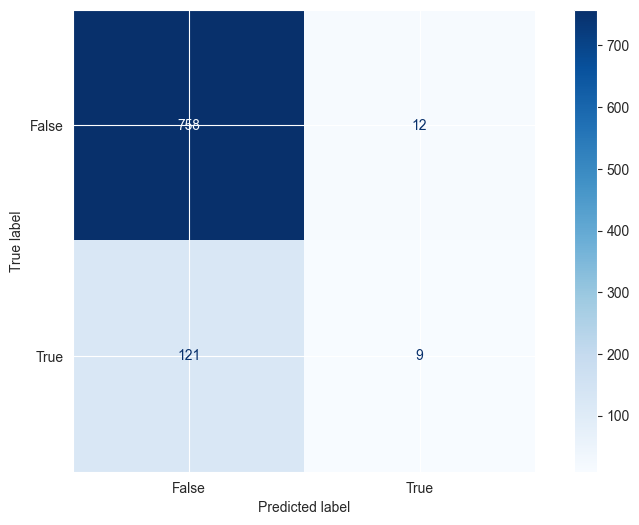

In [38]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')
plt.savefig('./images/lr_conf.png')

Compared to the random forest confusion matrix, this model did objectively worse (note: numbers are different due to different test size). The model predicted 175 customers would not churn, but they actually did. That is 14% of the customers, not a small loss. 

### KNN Report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42, stratify=y)
    
knn = model_factory(KNeighborsClassifier(n_neighbors=5), X.columns)

In [31]:
knn.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
knn_preds = knn.predict(X_test)

In [33]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94       770
        True       0.75      0.45      0.56       130

    accuracy                           0.90       900
   macro avg       0.83      0.71      0.75       900
weighted avg       0.89      0.90      0.89       900



The KNN report is comparable to the random forest report, with only slightly different results. However, it still did not do as well as random forest. 

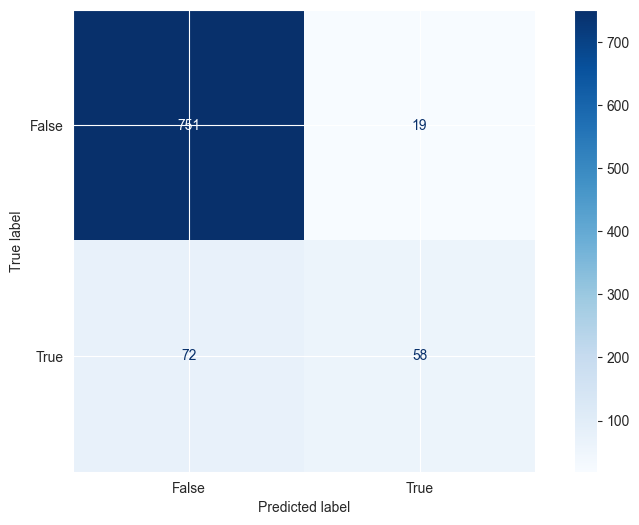

In [37]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.savefig('./images/knn_conf.png')

We can see from the confusion matrix that the numbers are pretty similar to random forest, but it did predict that 72 customers would not churn when they did. Random Forest performs better than that, so random forest would be considered our best model. 

### Pickling

The best performing model was Random Forest Classification, so we will use that in the Flask App 

In [35]:
import pickle

In [36]:
# with open('model.pkl', 'wb') as file:
#     pickle.dump(rf, file)